# Continuous Distributions

Compare versus the "coin flip" distributions in which our observed values only come from a discrete (either finite or countably infinite) set of possibilities. In a discrete distribution, there are single "elements" or "atoms" that have a non-zero probability of appearing, e.g. $P(HEADS) = 0.5$.

In a continous distribution, there are no single "atoms" that have a non-zero probability.

Example: a uniformly random value between $a$ and $b$, $U(a,b)$. In this case, simplify to $a=0$, $b=1$, then $P(0.5) = 0$. *But* the _distribution function_ of these values is not 0 between $a$ and $b$. 

For $U(a,b)$, the _pdf_ aka "probability density function" is
$$ f(x) = \begin{cases} \frac{1}{b-a} \quad a \leq x \leq b \\ 0 \quad \text{otherwise}. \end{cases} $$

The _cdf_ aka "cumulative density function" for this is
$$ F(x) = P(\text{value is at most } x) = \int_{-\infty}^{x} f(t) dt.$$
For $U(a,b)$ the cdf is going to be
$$ F(x) = \int_{-\infty}^{x} \frac{1}{b-a} dt = \int_{a}^{x} \frac{1}{b-a} dt  = \frac{t}{b-a} \Bigg|_{a}^{x} = \frac{x-a}{b-a}$$
taking care of other cases:
$$ F(x) = \begin{cases} 0 \quad x < a \\ \frac{x-a}{b-a} \quad a \leq x \leq b \\ 1 \quad x > b \end{cases} $$

In [2]:
def uniform_pdf(x, a, b):
    return 1.0/(b-a) if a <= x <= b else 0

In [3]:
def uniform_cdf(x, a, b):
    if x < a: return 0
    elif x <= b: return (x-a)/(b-a)
    else:     return 1

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math

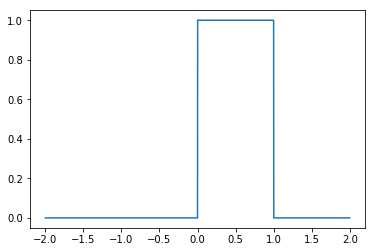

In [5]:
xs = np.arange(-2,2,0.001)
plt.plot(xs, [uniform_pdf(x, 0, 1) for x in xs])

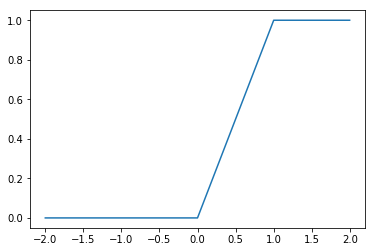

In [6]:
xs = np.arange(-2,2,0.001)
plt.plot(xs, [uniform_cdf(x, 0, 1) for x in xs])

# Random Variables

We say that $X$ is a *discrete* random variable if it takes value in some (finite or countably infinite) set $S$, and has an associated probability function $P$ such that

1. $0 \leq P(s) \leq 1 \; \forall s \in S$  and
2. $\sum_{s\in S} P(s) = 1.$

We sometimes call the triple $(X,S,P)$ a *probability space*.

Similarly, $X$ is a *continuous* random variable if it takes values in $S$ with distribution function $F: \mathbb{R} \to [0,1]$ where

1. $F$ is a (piecewise) continuous function,
2. $0 \leq F(x) \leq 1$ for all $x$,
3. $F(\infty) = \lim_{x \rightarrow \infty} F(x) = 1$, $F(-\infty) = 0$.

(Recall: $F(x) = P(X \leq x)$)

Example: let $X$ and $Y$ both be independent random variables with distribution $U(0,1)$.
Then they are both continuous with pdf $f(x) = x$.
Now we can talk about the event that both $X$ and $Y$ are less than $0.25$.
We can write this as $$ P(X < 0.25, Y < 0.25) = P(X < 0.25) P(Y < 0.25) = 0.25^2 = 0.0625. $$

When we look at data (e.g. adults data), the random variables are the "rows" of adult data and the values contained in there. For instance, we could look at the distribution of ages, the distribution of hours worked per week, the distribution of careers, income level, etc.

**Example:** If we say "$X$ has distribution $U(a,b)$" we mean that $X$ has distribution $$ F(x) = \begin{cases} 0 \quad x < a \\ \frac{x-a}{b-a} \quad a \leq x \leq b \\ 1 \quad x > b. \end{cases} $$
If the context is unclear, we sometimes use $F_X(x)$ to denote the distribution function (cdf) of $X$.

 **Example:** The *Normal* distribution (aka Gaussian) is the distribution denote $\mathcal{N}(\mu,\sigma)$ with pdf 
 $$f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma}} \exp\left( - \frac{(x-\mu)^2}{2 \sigma^2} \right)$$
 and cdf
 $$ F(x) = \frac{1}{2} \left[ 1 + \operatorname{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]. $$

In [7]:
# in python...
def normal_pdf(x, mu, sigma):
    return np.exp(-1*(x-mu)**2/(2 * sigma**2))/(np.sqrt(2*np.pi*sigma))

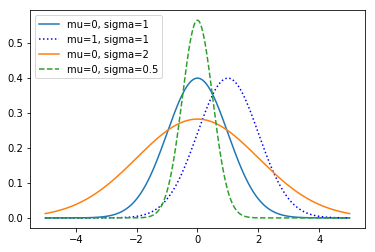

In [8]:
xs = np.arange(-5,5,0.001)
plt.plot(xs, [normal_pdf(x, 0, 1) for x in xs], label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, 1, 1) for x in xs], 'b:', label='mu=1, sigma=1')
plt.plot(xs, [normal_pdf(x, 0, 2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, 0, 0.5) for x in xs], '--', label='mu=0, sigma=0.5')
plt.legend(loc=2)

#plt.plot(xs, [normal_pdf(x, 0, 1) for x in xs])

In [9]:
# represents: 1) the prob that X (distributed as N(mu,sigma)) is <= x
# or 2) the integral of nomral_pdf from -infinity to x
def normal_cdf(x, mu, sigma):
    return (1 + math.erf((x-mu)/(sigma*np.sqrt(2))))/2

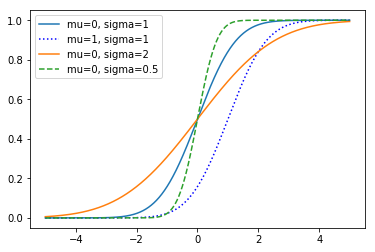

In [10]:
xs = np.arange(-5,5,0.001)
plt.plot(xs, [normal_cdf(x, 0, 1) for x in xs], label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, 1, 1) for x in xs], 'b:', label='mu=1, sigma=1')
plt.plot(xs, [normal_cdf(x, 0, 2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, 0, 0.5) for x in xs], '--', label='mu=0, sigma=0.5')
plt.legend(loc=2)

If we know the CDF of a distribution, we can calculate $P(X \in [a,b]) = F(b) - F(a)$.

**Definition:** The mean/expected value/average of a continuous random variable $X$ with pdf $f$ is denoted and defined as
$$ \mathbb{E}X = \int_{-\infty}^{\infty} x f(x) dx. $$
Also known as expected value, average.

**Definition:** The mean of a discrete random variable, $X$, that takes values in set $S \subset \mathbb{R}$ is denoted and defined as
$$ \mathbb{E}X = \sum_{s \in S} s \cdot P(X = s). $$

**Example:** Dice roll: $X$ takes value in $\{1,2,3,4,5,6\}$, each with probability $1/6$.
That is, $P(X = i) = 1/6$ for each $i \in \{1,2,3,4,5,6\}$.

So the mean of a (fair) die roll is
$$ \sum_{i=1}^{6} \frac{i}{6} = 3.5 $$

**Example:** Let $X$ be distributed as $U(0,1)$. Calculate 
$$\mathbb{E}X = \int_{-\infty}^{\infty} xf(x) dx = \int_{a}^{b} \frac{x}{b-a} dx$$

$$ = \int_{a}^{b} \frac{x}{b-a} dx = \frac{1}{b-a} \int_{a}^{b} x dx = \frac{1}{b-a} \left( \frac{x^2}{2} \Big|_{a}^{b} \right)$$

$$ = \frac{1}{b-a} \left( \frac{x^2}{2} \Big|_{a}^{b} \right) = \frac{1}{b-a}\frac{b^2 - a^2}{2}$$

$$= \frac{1}{b-a}\frac{b^2 - a^2}{2} = \frac{(b-a)(b+a)}{2(b-a)}$$

$$ = \frac{(b-a)(b+a)}{2(b-a)} = \frac{b+a}{2}$$

In our example, $a=0$, $b=1$, the average is $\frac{0+1}{2} = 0.5$.

**Definition:** The *variance* of a random variable $X$ is denoted and defined as 
$$ \operatorname{Var}(X) = \mathbb{E}\left( (X - \mathbb{E}X)^2 \right).$$

**Fact:** For random variable $X$ with $\mathbb{E}X = \mu$,
$$\operatorname{Var}(X) = \mathbb{E}(X^2 - 2X\mu + \mu^2) = \mathbb{E}X^2 - (\mathbb{E}X)^2$$

*Sub-fact:* Expectation (because it is an integral) is linear!
I.e. for $a,b \in \mathbb{R}$, $\mathbb{E}(aX + bY) = a\mathbb{E}X + b\mathbb{E}Y$.

$$ = \mathbb{E}(X^2 - 2X\mu + \mu^2) = \mathbb{E}X^2 - 2 \mu \mathbb{E}X + \mu^2.$$

$$ = \mathbb{E}X^2 - 2 \mu \mu + \mu^2 = \mathbb{E}X^2 - \mu^2 = \mathbb{E}(X^2) - (\mathbb{E}X)^2.$$

For random variables, $X$,$Y$, it is only true that $\mathbb{E}(XY) = (\mathbb{E}X)(\mathbb{E}Y)$ if they are independent.

**Co-variance**: For two random variables, the _covariance_ of $X$ and $Y$ is denoted and defined as $$\operatorname{cov}(X,Y) = \mathbb{E}\left[ (X-\mathbb{E}X)(Y - \mathbb{E}Y)) \right]. $$

If $X \perp Y$ (i.e. $X$ and $Y$ are independent) then
$$ \begin{align*}
\operatorname{cov}(X,Y) &= \left(\mathbb{E}(X - \mathbb{E}X) \right) \left(\mathbb{E}(Y - \mathbb{E}Y \right) \\
&= (\mathbb{E}X - \mathbb{E}X)( \mathbb{E}Y - \mathbb{E}Y) \\
&= 0
\end{align*}
$$

**Fact:** By linearity of expectation, if $X$ has mean $\mu$, then $X - \mu$ has mean 0.

In [11]:
def mean(x):
    return sum(x)/len(x)

def cov(x, y):
    # centered x's
    xmean = mean(x)
    xs = [i - xmean for i in x]
    
    ymean = mean(y)
    ys = [i - ymean for i in y]
    
    return mean([xi * yi for (xi, yi) in zip(xs, ys)])

0.5

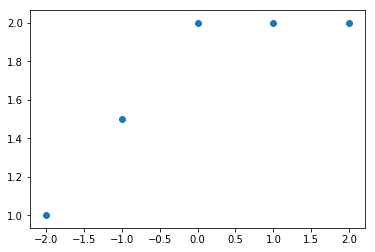

In [12]:
x = [-2, -1,  0, 1, 2]
y = [ 1,  1.5,  2, 2, 2]

plt.scatter(x,y)

cov(x,y)

In [13]:
# Example:
x = [-2, -1,  0, 1, 2]
y = [ 2,  1,  0, 1, 2] # y = |x|

cov(x,y)

0.0

81666.6666667


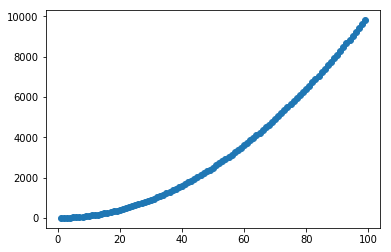

In [14]:
x = np.arange(1,100)
y = np.arange(1,100) ** 2

print(cov(x,y))

plt.scatter(x,y)

# Central Limit Theorem

Let random variable $X$ have mean $\mu$ and standard deviation $\sigma$.
Then, if $x_1, x_2, \dots, x_n$ are iid samples of $X$,
$$ \bar{x} = \frac{1}{n} (x_1 + x_2 + \dots + x_n)$$
will, if $n$ is large, "behave like " $\mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$.

The Bernoulli distribution with parameter $p$ takes value $1$ with probability $p$ and $0$ with probability $1-p$. Denote this as $\operatorname{Bernoulli}(p)$.

The Binomial distribution is realized as a sum of Bernoulli trials.
We say $\operatorname{Binom}(n,p)$ is the sum of $n$ variables with distribution $\operatorname{Bernoulli}(p)$.

The mean of a $\operatorname{Bernoulli(p)}$ random variable is $p = 1 
\cdot p + 0 \cdot (1-p)$.

The mean of Binomial($n,p$) is $np$ because it is the sum of $n$ r.v's each with mean $p$.

The variance of Binomial($n,p$) is $n p (1-p)$.

Let $X$ be distributed as Binom($n,p$). Then
$$\begin{align*} \operatorname{Var}(X) &= \mathbb{E} (X - np)^2 \\
&= \mathbb{E}X^2 - 2np\mathbb{E}X + n^2 p^2 \\
&= \mathbb{E}X^2 - 2n^2p^2 + n^2 p^2 \\
&= -n^2 p^2 + \mathbb{E} X^2
\end{align*}$$

Finally, after some scratch work, we get
$$ \operatorname{Var}(X) = np(1-p) $$

So if we are estimating the average of a Binom($n,p$) random variable, the distribution of the average should look like $\mathcal{N}\left(np, \sqrt{np(1-p)} \right)$.

Counter({50: 88, 49: 82, 52: 81, 51: 78, 53: 70, 48: 69, 47: 66, 45: 65, 46: 61, 55: 52, 56: 43, 54: 41, 44: 37, 43: 34, 58: 24, 57: 23, 59: 21, 42: 20, 41: 11, 60: 8, 40: 7, 38: 3, 61: 3, 62: 3, 39: 2, 64: 2, 63: 2, 35: 2, 37: 1, 36: 1})


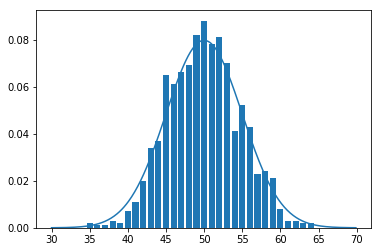

In [15]:
from collections import Counter

# Example: take coin flips, Bernoulli random variable
n = 100
p = 0.5
num = 1000

# a single of binomial(n,p)
# the estimated of these should look like N(np, sqrt(np(1-p)))
def binom(n,p):
    return sum([np.random.choice([0,1], p=[1-p,p]) for _ in range(0,n)])

data = [binom(n,p) for _ in range(num)]

# Counter will count the occurences of values
# so key: value says that we got "key" heads, "value" times
counts = Counter(data)
print(counts)

plt.bar([x for x in counts.keys()],[v / num for v in counts.values()])

#means = [mean(binom(n,p,100)) for _ in range(0,100)]

mu = n*p
sigma = math.sqrt(n*p*(1-p))

xs = np.arange(-20,20,0.1) + mu
# the CLT says the average of a binom(n,p) will follow this curve
# normal_cdf(x + 0.5, mu, sigma) - normal_cdf(x - 0.5, mu, sigma) is 
# Prob( Normal lies within [x-0.5, x+0.5] ), i.e. the integral of the 
# normal pdf from x-0.5 to x+0.5, i.e the integral of a "strip" of the normal pdf around x
plt.plot(xs, [normal_cdf(x + 0.5, mu, sigma) - normal_cdf(x - 0.5, mu, sigma) for x in xs])

Estimating the mean is an example of _point estimation_. Specifically, when estimating the mean of $X$ with mean $\mu$ and standard deviation $\sigma$, define the **Standard Error** as
$$ \operatorname{SE} := \operatorname{Std}(\bar{x})= \frac{\sigma_x}{\sqrt{n}} = \sqrt{\operatorname{Var}(\bar{x})}. $$

What we do is, for the empirical mean $\bar{x}$, use $\sigma_{\bar{x}}$ as a substitute.
By some results from probability, this is pretty accurate when $n > 30$.

What to do with the standard error: construct confidence interval.

Quick and dirty example: if we have a point estimate $\bar{x}$ with standard error SE, the interval in which 95% of the $\bar{x}$ values should lie is given by 
$$ [ \bar{x} - 1.96 \operatorname{SE}, \bar{x} + 1.96 \operatorname{SE} ] $$

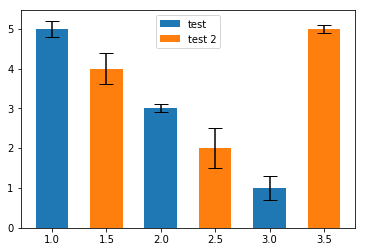

In [16]:
import numpy as np

bar1 = [5, 3, 1]
bar2 = [4, 2, 5]

plt.bar([1,2,3],bar1, yerr=[0.2, 0.1, 0.3], capsize=7, width=0.3, label='test')
plt.bar(np.array([1,2,3])+0.5,bar2, yerr=[0.4, 0.5, 0.1], capsize=7, width=0.3, label='test 2')
plt.legend()

In [17]:
# Put a confidence interval on our coin flip distribution mean
# data is an array of Binom(n,p) samples so view these each as the sum of 100 coin flips
# dividing data by 100 gives 10,000 samples of xbar
print(data[0]/n)
print(n)
data2 = np.array(data) / n
print(data2[:10])

print(f"The point estimate of xbar is : {data2.mean()}")
print(f"The SE is {data2.std()}")
print(f"The interval is +- {1.96*data2.std()}")

0.49
100
[ 0.49  0.46  0.57  0.45  0.49  0.49  0.57  0.47  0.43  0.52]
The point estimate of xbar is : 0.49986
The SE is 0.047048702426315654
The interval is +- 0.09221545675557868


<BarContainer object of 1 artists>

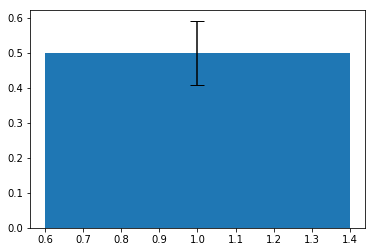

In [18]:
plt.bar([1],[data2.mean()], yerr=[1.96*data2.std()], capsize=7)

## Hypothesis Testing

Idea:

1. Pick a Hypothesis, $H_0$ (the _null_ hypothesis). For example: "our coin is fair; i.e. $p = 0.5$".
2. If $H_0$ is true, we know then that the sum of $n$ of these coin flips is approx $\mathcal{N}\left(np, \sqrt{np(1-p)} \right)$.
3. Then, start calculating some estimates of this quantity, see how many of them "are too extreme".
4. If it is too extreme, "reject the null hypothesis" or not.


In [44]:
n = 1000
p = 0.5
flips = binom(n,p)
mu = n*p
sigma = math.sqrt(n*p*(1-p))
flips

503

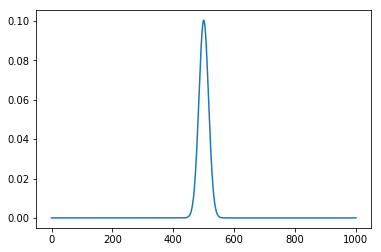

In [35]:
xs = np.arange(0,1000,0.001)
plt.plot(xs, [normal_pdf(x, mu, sigma) for x in xs])

For a cdf, $F$, of random variable $X$, we want to be able to know the _inverse_ distribution function, denoted and defined as $ F^{-1}(x) = t $ where $t$ is the unique value such that $F(t) = P(X \leq t ) = x$.

In [21]:
normal_cdf(4 + 5*10, 4, 5)

1.0

In [22]:
# for the normal distribution
def inverse_normal_cdf(t, mu, sigma):
    # BINARY SEARCH!
    # - start our "low" value at somewhere like -10
    # - start out "high" value at ~ 10
    
    # make sure these center around mu
    high, low = 10*sigma + mu, -10*sigma + mu
    
    # the tolerance if we are "close enough" to t
    tol = 1e-5
    
    # for safety
    max_iters = 1000
    loop = 0
    
    while loop < max_iters:
        loop += 1
        mid = (high+low)/2
        if abs(normal_cdf(mid, mu, sigma) - t) < tol:
            return mid
        elif normal_cdf(mid, mu, sigma) > t:
            high = mid # mid is too high, bring the range down 
        else:
            low = mid
    
    print("Error! Took too long to converge!")

In [23]:
inverse_normal_cdf(0.95, 0, 1) # try for standard normal

1.6448974609375

In [24]:
normal_cdf(inverse_normal_cdf(0.95, 0, 1), 0, 1)

0.9500045206832439

In [25]:
# Calculate the probability of lying inside the
# range [mu - t, mu + t]
def normal_center_probability(t, mu, sigma):
    # return the difference of two integrals
    return normal_cdf(mu + t, mu, sigma) - normal_cdf(mu - t, mu, sigma)

# Calculates the probability of lying oustide the range
# [mu - t, mu + t]
def normal_tail_probability(t, mu, sigma):
    # use the law of total probability, full integral must be 1
    return 1 - normal_center_probability(t, mu, sigma)

In [26]:
def normal_two_sided_limits(p, mu, sigma):
    # calculate the bounds around the mean
    # that have probability p
    tail_p = (1 - p)/2
    
    # how far to the right do we get probability tail_p
    high = inverse_normal_cdf(1 - tail_p, mu, sigma)
    
    # how far to the left
    low = inverse_normal_cdf(tail_p, mu, sigma)
    
    return low, high

In [37]:
def two_sided_p_value(x, mu, sigma):
    """
    Calculates that, assuming X comes from N(mu, sigma),
    what is the probability that we observe something as
    extreme as x. I.e. what is the probabily in the tails
    that are |mu-x| apart.
    """
    return normal_tail_probability(abs(mu-x), mu, sigma)

In [36]:
normal_two_sided_limits(0.95, mu, sigma)

(469.0122266638163, 530.9877733361837)

In [29]:
normal_tail_probability(16, mu, sigma)

0.3115720733144085

In [30]:
normal_center_probability(16, mu, sigma)

0.6884279266855915

In [31]:
two_sided_p_value(486, mu, sigma)

0.3759205825480747

In [32]:
sigma

15.811388300841896

In [46]:
two_sided_p_value(545, mu, sigma) # If H0 were true, we just won the lottery. So... H0 is probably false :(

0.004426525857919916

In [58]:
n = 1000
p = 0.52
flips = binom(n,p)
flips

529

# Correlation

Two variables are said to correlate if they increase/decrease together.
The _correlation coefficient_ between random variables $X$ and $Y$ is defined as
$$
\frac{\operatorname{Cov}(X,Y)}{\sigma_X \sigma_Y}.
$$